# UAS Teknik Visualisasi Data

## Import Module

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, mode
from scipy.stats import skew
from scipy.stats import scoreatpercentile
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Read Data From CSV File

In [4]:
df = pd.read_csv('Sample - Superstore.csv')

## Read The First 5 Data

In [5]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Identifikasi Missing Values

In [6]:
# Menampilkan kolom dengan jumlah missing values
print(df.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


## Pearson Correlation Analysis of Sales and Quantity

In [7]:
korelasi = pearsonr(df['Sales'], df['Quantity'])
print(korelasi.statistic)

0.20079477137389762


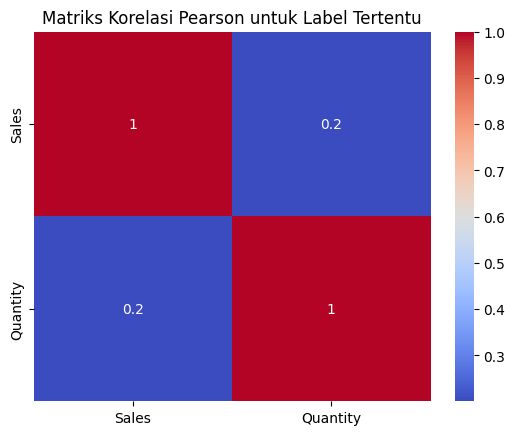

In [8]:
selected_columns = ['Sales', 'Quantity']
correlation_matrix = df[selected_columns].corr()

# Visualisasi dengan heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi Pearson untuk Label Tertentu')
plt.show()

## Pearson Correlation Analysis of Sales and Discount

In [9]:
korelasi = pearsonr(df['Sales'], df['Discount'])
print(korelasi.statistic)

-0.02819012415753522


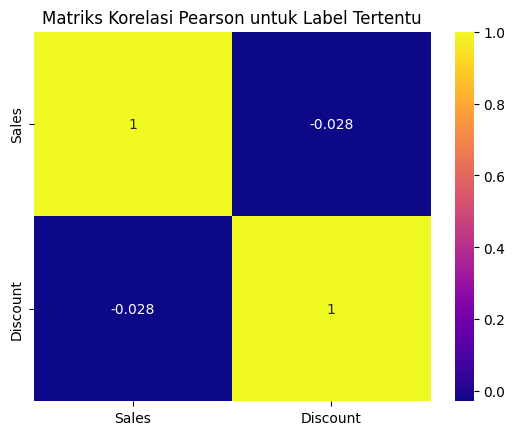

In [10]:
selected_columns = ['Sales', 'Discount']
correlation_matrix = df[selected_columns].corr()

# Visualisasi dengan heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='plasma')
plt.title('Matriks Korelasi Pearson untuk Label Tertentu')
plt.show()

## Pearson Correlation Analysis of Sales and Profit

In [11]:
korelasi = pearsonr(df['Sales'], df['Profit'])
print(korelasi.statistic)

0.4790643497377067


## Pearson Correlation Analysis of Quantity and Discount

In [12]:
korelasi = pearsonr(df['Quantity'], df['Discount'])
print(korelasi.statistic)

0.008622970271156417


## Pearson Correlation Analysis of Quantity and Profit

In [13]:
korelasi = pearsonr(df['Quantity'], df['Profit'])
print(korelasi.statistic)

0.06625318912428486


## Pearson Correlation Analysis of Discount and Profit

In [14]:
korelasi = pearsonr(df['Discount'], df['Profit'])
print(korelasi.statistic)

-0.21948745637176584


## Setelah dilakukan analisis korelasi Pearson antara variabel 'Sales', 'Quantity', 'Discount', dan 'Profit' ditemukan bahwa:
- Variabel 'Sales' dan 'Quantity' berkorelasi sangat lemah
- Variabel 'Sales' dan 'Discount' berkorelasi Sangat lemah
- Variabel 'Sales' dan 'Profit' berkorelasi lemah
- Variabel 'Quantity' dan 'Discount' berkorelasi sangat lemah
- Variabel 'Quantity' dan 'Profit' berkorelasi sangat lemah
- Variabel 'Discount' dan 'Profit' berkorelasi sangat lemah

#  Sales (Mean, Median, Modus, Range, Varians, Standar Deviasi)

In [15]:
sales_mean = np.mean(df['Sales'])
sales_median = np.median(df['Sales'])
sales_modus = mode(df['Sales'])


print(f'Sales Mean : {sales_mean}')
print(f'Sales Median : {sales_median}')
print(f'Sales Modus : {sales_modus.mode}')


Sales Mean : 229.85800083049833
Sales Median : 54.489999999999995
Sales Modus : 12.96


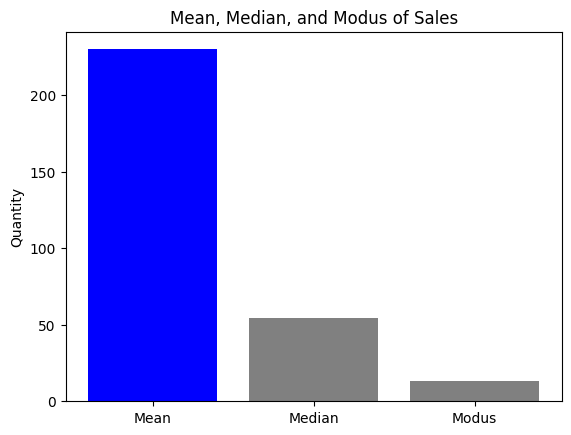

In [16]:
# Membuat grafik batang
labels = ['Mean', 'Median', 'Modus']
values = [sales_mean, sales_median, sales_modus.mode]

plt.bar(labels, values, color=['blue', 'grey', 'grey'])
plt.ylabel('Quantity')
plt.title('Mean, Median, and Modus of Sales')
plt.show()

#  Quantity (Mean, Median, Modus)

In [17]:
Quantity_Mean = np.mean(df['Quantity'])
Quantity_Median = np.median(df['Quantity'])
Quantity_Modus = mode(df['Quantity'])

print(f'Quantity Mean: {Quantity_Mean}')
print(f'Quantity Median: {Quantity_Median}')
print(f'Quantity Modus: {Quantity_Modus.mode}')

Quantity Mean: 3.789573744246548
Quantity Median: 3.0
Quantity Modus: 3


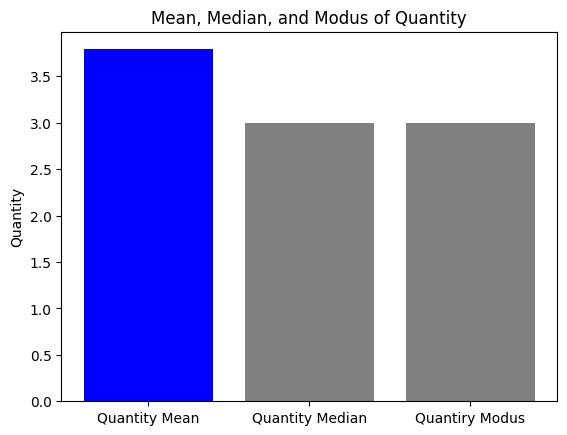

In [18]:
# Membuat grafik batang
labels = ['Quantity Mean', 'Quantity Median', 'Quantiry Modus']
values = [Quantity_Mean, Quantity_Median, Quantity_Modus.mode]

plt.bar(labels, values, color=['blue', 'grey', 'grey'])
plt.ylabel('Quantity')
plt.title('Mean, Median, and Modus of Quantity')
plt.show()

#  Discount (Mean, Median, Modus)

In [19]:
Discount_Mean = np.mean(df['Discount'])
Discount_Median = np.median(df['Discount'])
Discount_Modus = mode(df['Discount'])

print(f'Discount Mean: {Discount_Mean}')
print(f'Discount Median: {Discount_Median}')
print(f'Discount Modus: {Discount_Modus.mode}')

Discount Mean: 0.15620272163297977
Discount Median: 0.2
Discount Modus: 0.0


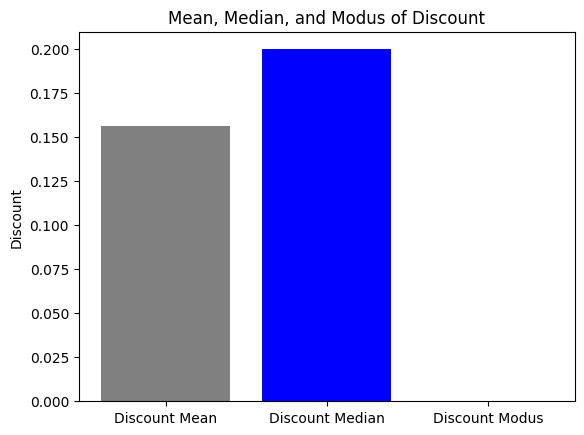

In [20]:
# Membuat grafik batang
labels = ['Discount Mean', 'Discount Median', 'Discount Modus']
values = [Discount_Mean, Discount_Median, Discount_Modus.mode]

plt.bar(labels, values, color=['grey', 'blue', 'grey'])
plt.ylabel('Discount')
plt.title('Mean, Median, and Modus of Discount')
plt.show()

#  Profit (Mean, Median, Modus)

In [21]:
Profit_Mean = np.mean(df['Profit'])
Profit_Median = np.median(df['Profit'])
Profit_Modus = mode(df['Profit'])

print(f'Profit Mean: {Profit_Mean}')
print(f'Profit Median: {Profit_Median}')
print(f'Profit Modus: {Profit_Modus.mode}')

Profit Mean: 28.65689630778467
Profit Median: 8.666499999999996
Profit Modus: 0.0


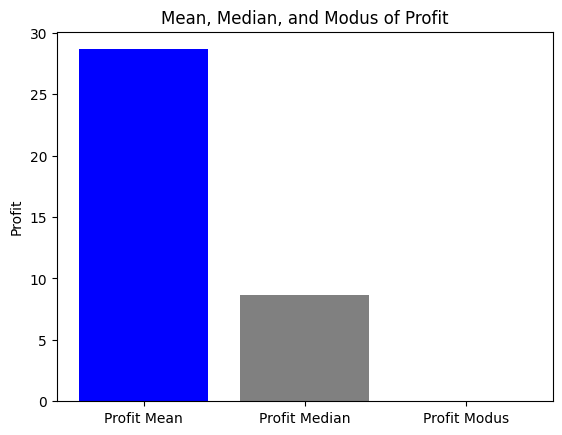

In [22]:
# Membuat grafik batang
labels = ['Profit Mean', 'Profit Median', 'Profit Modus']
values = [Profit_Mean, Profit_Median, Profit_Modus.mode]

plt.bar(labels, values, color=['blue', 'grey', 'grey'])
plt.ylabel('Profit')
plt.title('Mean, Median, and Modus of Profit')
plt.show()

# Sales (Range, Varians, Std Deviasi)

In [23]:
sales_range = np.max(df['Sales']) - np.min(df['Sales'])
sales_var = np.var(df['Sales'])
sales_std = np.std(df['Sales'])

print(f'Rentang (Range): {sales_range}')
print(f'Varians Sales : {sales_var}')
print(f'Standar Deviasi Sales : {sales_std}')

Rentang (Range): 22638.036
Varians Sales : 388395.58854248544
Standar Deviasi Sales : 623.2139187650461


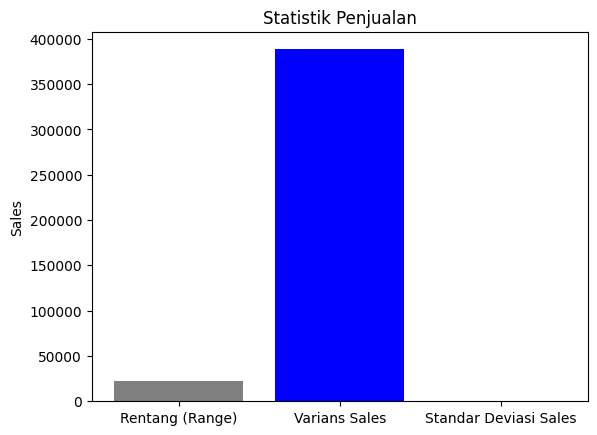

In [24]:
# Menyiapkan data untuk visualisasi
stats_labels = ['Rentang (Range)', 'Varians Sales', 'Standar Deviasi Sales']
stats_values = [sales_range, sales_var, sales_std]

plt.bar(stats_labels, stats_values, color=['grey', 'blue', 'grey'])
plt.ylabel('Sales')
plt.title('Statistik Penjualan')
plt.show()

# Quantity (Range, Varians, Std Deviasi)

In [25]:
quantity_range = np.max(df['Quantity']) - np.min(df['Quantity'])
quantity_var = np.var(df['Quantity'])
quantity_std = np.std(df['Quantity'])

print(f'Rentang (Range): {quantity_range}')
print(f'Varians Quantity : {quantity_var}')
print(f'Standar Deviasi Quantity : {quantity_std}')

Rentang (Range): 13
Varians Quantity : 4.95061772905248
Standar Deviasi Quantity : 2.224998366078609


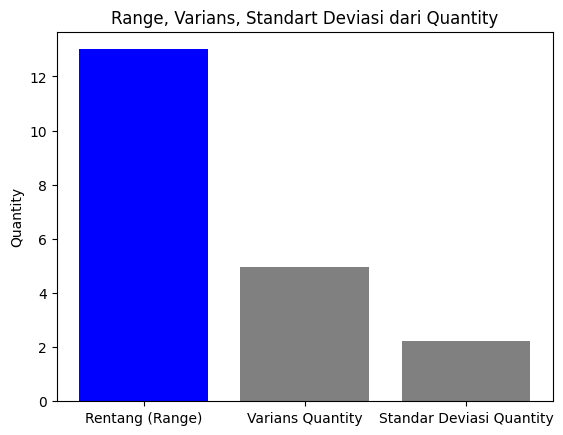

In [26]:
# Menyiapkan data untuk visualisasi
stats_labels = ['Rentang (Range)', 'Varians Quantity', 'Standar Deviasi Quantity']
stats_values = [quantity_range, quantity_var, quantity_std]

plt.bar(stats_labels, stats_values, color=['blue', 'grey', 'grey'])
plt.ylabel('Quantity')
plt.title('Range, Varians, Standart Deviasi dari Quantity')
plt.show()

# Discount (Range, Varians, Std Deviasi)

In [27]:
discount_range = np.max(df['Discount']) - np.min(df['Discount'])
discount_var = np.var(df['Discount'])
discount_std = np.std(df['Discount'])

print(f'Rentang (Range): {discount_range}')
print(f'Varians Discount : {discount_var}')
print(f'Standar Deviasi Discount : {discount_std}')

Rentang (Range): 0.8
Varians Discount : 0.0426181502187284
Standar Deviasi Discount : 0.2064416387716596


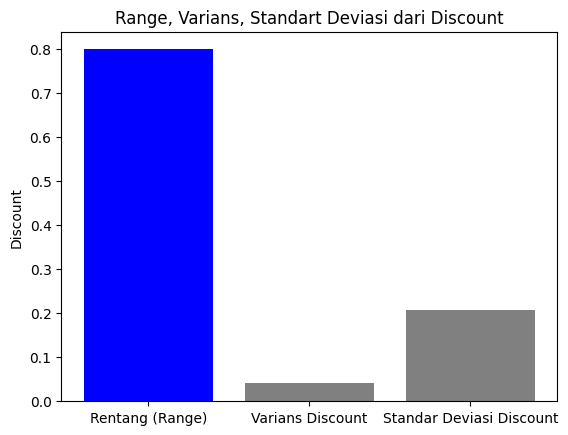

In [28]:
# Menyiapkan data untuk visualisasi
stats_labels = ['Rentang (Range)', 'Varians Discount', 'Standar Deviasi Discount']
stats_values = [discount_range, discount_var, discount_std]

plt.bar(stats_labels, stats_values, color=['blue', 'grey', 'grey'])
plt.ylabel('Discount')
plt.title('Range, Varians, Standart Deviasi dari Discount')
plt.show()

# Profit (Range, Varians, Std Deviasi)

In [29]:
Profit_range = np.max(df['Profit']) - np.min(df['Profit'])
Profit_var = np.var(df['Profit'])
Profit_std = np.std(df['Profit'])

print(f'Rentang (Range): {Profit_range}')
print(f'Varians Profit : {Profit_var}')
print(f'Standar Deviasi Profit : {Profit_std}')

Rentang (Range): 14999.954000000002
Varians Profit : 54872.306980928704
Standar Deviasi Profit : 234.2483873603588


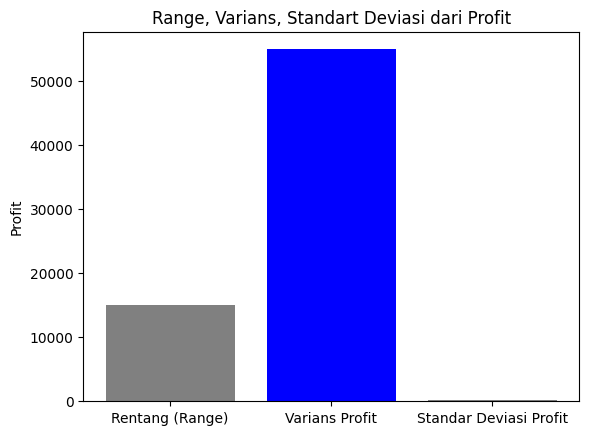

In [30]:
# Menyiapkan data untuk visualisasi
stats_labels = ['Rentang (Range)', 'Varians Profit', 'Standar Deviasi Profit']
stats_values = [Profit_range, Profit_var, Profit_std]

plt.bar(stats_labels, stats_values, color=['grey', 'blue', 'grey'])
plt.ylabel('Profit')
plt.title('Range, Varians, Standart Deviasi dari Profit')
plt.show()

# Skewness of Sales, Quantity, Discount, Sales

In [31]:
#Sales
skewness = skew(df['Sales'])
print("Skewness of Sales:", skewness)

#Quantity
skewness = skew(df['Quantity'])
print("Skewness of Quantity:", skewness)

#Discount
skewness = skew(df['Discount'])
print("Skewness of Discount:", skewness)

#Profit
skewness = skew(df['Profit'])
print("Skewness of Profit:", skewness)

Skewness of Sales: 12.970805179533526
Skewness of Quantity: 1.2783528478702606
Skewness of Discount: 1.6840419409939928
Skewness of Profit: 7.560296619477546


# Kuartil of Sales, Quantity, Discount, Sales

In [32]:
# Sales
q1s = scoreatpercentile(df['Sales'], 25)
q2s = scoreatpercentile(df['Sales'], 50)  # Median
q3s = scoreatpercentile(df['Sales'], 75)

print("--Sales--")
print("Kuartil Pertama (Q1):", q1s)
print("Kuartil Kedua (Median/Q2):", q2s)
print("Kuartil Ketiga (Q3):", q3s)

# Quantity
q1q = scoreatpercentile(df['Quantity'], 25)
q2q = scoreatpercentile(df['Quantity'], 50)  # Median
q3q = scoreatpercentile(df['Quantity'], 75)

print("--Quantity--")
print("Kuartil Pertama (Q1):", q1q)
print("Kuartil Kedua (Median/Q2):", q2q)
print("Kuartil Ketiga (Q3):", q3q)

# Discount
q1d = scoreatpercentile(df['Discount'], 25)
q2d = scoreatpercentile(df['Discount'], 50)  # Median
q3d = scoreatpercentile(df['Discount'], 75)

print("--Discount--")
print("Kuartil Pertama (Q1):", q1d)
print("Kuartil Kedua (Median/Q2):", q2d)
print("Kuartil Ketiga (Q3):", q3d)

# Profit
q1p = scoreatpercentile(df['Profit'], 25)
q2p = scoreatpercentile(df['Profit'], 50)  # Median
q3p = scoreatpercentile(df['Profit'], 75)

print("--Profit--")
print("Kuartil Pertama (Q1):", q1p)
print("Kuartil Kedua (Median/Q2):", q2p)
print("Kuartil Ketiga (Q3):", q3p)

--Sales--
Kuartil Pertama (Q1): 17.28
Kuartil Kedua (Median/Q2): 54.489999999999995
Kuartil Ketiga (Q3): 209.94
--Quantity--
Kuartil Pertama (Q1): 2.0
Kuartil Kedua (Median/Q2): 3.0
Kuartil Ketiga (Q3): 5.0
--Discount--
Kuartil Pertama (Q1): 0.0
Kuartil Kedua (Median/Q2): 0.2
Kuartil Ketiga (Q3): 0.2
--Profit--
Kuartil Pertama (Q1): 1.72875
Kuartil Kedua (Median/Q2): 8.666499999999996
Kuartil Ketiga (Q3): 29.364


# Outlier of Sales, Quantity, Discount, Sales

In [33]:
# Ambil data dari dataset (gantilah dengan data sesuai dataset Anda)
dataS = df['Sales'].values

# Hitung kuartil
Q1 = np.percentile(dataS, 25)
Q3 = np.percentile(dataS, 75)

# Hitung IQR
IQR = Q3 - Q1

# Hitung batas bawah dan batas atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Temukan outlier
outliers = (dataS < lower_bound) | (dataS > upper_bound)

# Cetak hasil
print("---Sales---")
print("Data:", dataS)
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Outliers:", dataS[outliers])

---Sales---
Data: [261.96  731.94   14.62  ... 258.576  29.6   243.16 ]
Q1: 17.28
Q3: 209.94
IQR: 192.66
Lower Bound: -271.71000000000004
Upper Bound: 498.93
Outliers: [ 731.94    957.5775  907.152  ... 1925.88   2405.2     735.98  ]


In [34]:
# Ambil data dari dataset
dataQ = df['Quantity'].values

# Hitung kuartil
Q1 = np.percentile(dataQ, 25)
Q3 = np.percentile(dataQ, 75)

# Hitung IQR
IQR = Q3 - Q1

# Hitung batas bawah dan batas atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Temukan outlier
outliers = (dataQ < lower_bound) | (dataQ > upper_bound)

# Cetak hasil
print("---Quantity---")
print("Data:", dataQ)
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Outliers:", dataQ[outliers])

---Quantity---
Data: [2 3 2 ... 2 4 2]
Q1: 2.0
Q3: 5.0
IQR: 3.0
Lower Bound: -2.5
Upper Bound: 9.5
Outliers: [14 14 11 13 10 10 13 12 10 13 14 10 10 14 10 11 10 12 12 13 14 12 12 12
 13 13 10 11 14 14 14 13 14 11 10 13 10 13 12 10 10 13 13 13 10 11 11 10
 14 11 14 11 10 13 11 13 11 10 14 10 12 12 10 10 10 14 10 11 11 10 11 12
 11 13 10 12 11 10 12 10 11 11 10 14 12 13 10 10 12 11 14 14 10 10 12 10
 11 14 10 12 10 11 10 14 14 10 10 14 11 11 11 12 10 11 12 10 13 11 14 10
 10 11 12 10 10 12 12 10 14 10 11 10 10 10 10 10 11 10 11 12 14 13 11 10
 10 12 11 14 13 13 11 13 10 13 13 14 10 10 14 14 13 11 13 13 10 13 11 14
 14 10]


In [35]:
# Ambil data dari dataset
dataD = df['Discount'].values

# Hitung kuartil
Q1 = np.percentile(dataD, 25)
Q3 = np.percentile(dataD, 75)

# Hitung IQR
IQR = Q3 - Q1

# Hitung batas bawah dan batas atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Temukan outlier
outliers = (dataD < lower_bound) | (dataD > upper_bound)

# Cetak hasil
print("---Discount---")
print("Data:", dataD)
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Outliers:", dataD[outliers])

---Discount---
Data: [0.  0.  0.  ... 0.2 0.  0. ]
Q1: 0.0
Q3: 0.2
IQR: 0.2
Lower Bound: -0.30000000000000004
Upper Bound: 0.5
Outliers: [0.8 0.8 0.7 0.7 0.6 0.8 0.6 0.6 0.7 0.8 0.7 0.7 0.7 0.8 0.8 0.8 0.7 0.8
 0.7 0.7 0.7 0.7 0.7 0.6 0.6 0.6 0.6 0.8 0.8 0.7 0.7 0.7 0.7 0.7 0.7 0.7
 0.8 0.8 0.7 0.8 0.7 0.7 0.7 0.6 0.8 0.7 0.7 0.7 0.8 0.8 0.6 0.8 0.6 0.7
 0.7 0.7 0.7 0.7 0.7 0.8 0.7 0.7 0.8 0.8 0.6 0.8 0.6 0.8 0.7 0.7 0.8 0.7
 0.7 0.7 0.8 0.7 0.7 0.7 0.7 0.8 0.8 0.7 0.7 0.7 0.7 0.7 0.8 0.7 0.7 0.7
 0.8 0.7 0.7 0.7 0.7 0.7 0.8 0.8 0.6 0.8 0.8 0.8 0.8 0.7 0.7 0.7 0.7 0.7
 0.7 0.8 0.8 0.7 0.8 0.7 0.7 0.8 0.8 0.8 0.7 0.7 0.6 0.7 0.7 0.7 0.6 0.6
 0.7 0.7 0.7 0.7 0.6 0.8 0.8 0.8 0.8 0.8 0.6 0.7 0.7 0.7 0.6 0.8 0.7 0.7
 0.7 0.7 0.7 0.7 0.8 0.7 0.7 0.8 0.7 0.6 0.8 0.6 0.8 0.7 0.6 0.8 0.7 0.7
 0.7 0.7 0.7 0.7 0.7 0.8 0.8 0.7 0.8 0.6 0.8 0.7 0.7 0.7 0.7 0.7 0.8 0.7
 0.7 0.6 0.8 0.7 0.6 0.8 0.6 0.8 0.8 0.8 0.7 0.6 0.8 0.7 0.6 0.7 0.7 0.8
 0.8 0.6 0.8 0.8 0.8 0.7 0.8 0.8 0.6 0.6 0.7 0.6 0.7 0.7 0.7

In [36]:
# Ambil data dari dataset
dataP = df['Profit'].values

# Hitung kuartil
Q1 = np.percentile(dataP, 25)
Q3 = np.percentile(dataP, 75)

# Hitung IQR
IQR = Q3 - Q1

# Hitung batas bawah dan batas atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Temukan outlier
outliers = (dataP < lower_bound) | (dataP > upper_bound)

# Cetak hasil
print("---Profit---")
print("Data:", dataP)
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Outliers:", dataP[outliers])

---Profit---
Data: [ 41.9136 219.582    6.8714 ...  19.3932  13.32    72.948 ]
Q1: 1.72875
Q3: 29.364
IQR: 27.63525
Lower Bound: -39.724125
Upper Bound: 70.816875
Outliers: [ 219.582  -383.031    90.7152 ...  331.191   153.1152   72.948 ]


# PCA (Principal Component Analysis)

In [64]:
data = pd.read_csv('Sample - Superstore copy.csv')

# Pilih kolom-kolom yang akan digunakan untuk PCA (ganti dengan kolom sesuai dataset Anda)
selected_columns = ['Sales', 'Quantity', 'Discount', 'Profit']
data_subset = data[selected_columns]

# Normalisasi data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_subset)

# Inisialisasi objek PCA
pca = PCA(n_components=2)

# Fitting dan transformasi data
principal_components = pca.fit_transform(scaled_data)

# Hasil PCA sebagai DataFrame baru
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Gabungkan DataFrame hasil PCA dengan DataFrame asli
result_df = pd.concat([data, principal_df], axis=1)

# Tampilkan hasil
print(result_df)

      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
1          2  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
2          3  CA-2016-138688   6/12/2016   6/16/2016    Second Class   
3          4  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
4          5  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2014-110422   1/21/2014   1/23/2014    Second Class   
9990    9991  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9991    9992  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9992    9993  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9993    9994  CA-2017-119914    5/4/2017    5/9/2017    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United 

In [62]:
print("Rasio Varians:\n", pca.explained_variance_ratio_)

Rasio Varians:
 [0.39749164 0.26467547]


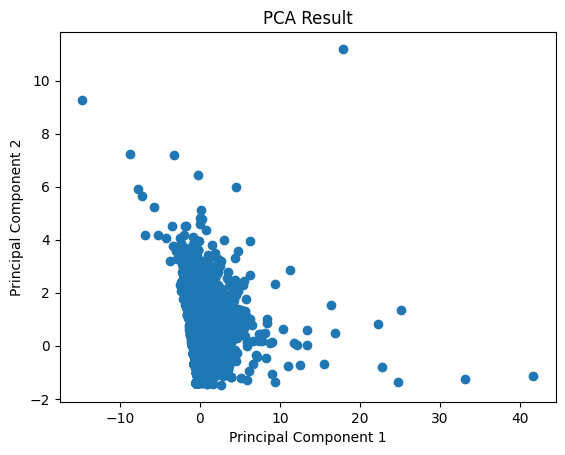

In [57]:
# Visualisasi data hasil PCA
plt.scatter(result_df['Principal Component 1'], result_df['Principal Component 2'])
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Explained Variance:
 [0.39749164 0.26467547]
